### Step 1: Data

#### yahoo download

In [1]:
import pandas as pd
import numpy as np
import datetime
import itertools
import yfinance as yf

from yahoodownloader import YahooDownloader
from preprocessors import FeatureEngineer, data_split, INDICATORS
import config_tickers


In [2]:
# aapl_df_yf = yf.download(tickers = "^DJI", start='2020-01-01', end='2020-01-31')
aapl_df_yf = yf.download(tickers = "DOW", start='2020-01-01', end='2020-01-31')

[*********************100%***********************]  1 of 1 completed


In [3]:
aapl_df_yf.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,55.230000,55.540001,53.639999,53.750000,45.447075,5145200
2020-01-03,53.110001,53.599998,52.410000,52.419998,44.322525,5004300
2020-01-06,52.320000,52.880001,52.000000,52.209999,44.144962,4293100
2020-01-07,52.290001,53.064999,51.990002,52.189999,44.128048,5122800
2020-01-08,52.410000,53.169998,51.919998,52.730000,44.584633,3629700


In [5]:
aapl_df_finrl = YahooDownloader(start_date = '2020-01-01',
                                end_date = '2020-01-31',
                                ticker_list = ['aapl']).fetch_data()

[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (20, 8)


In [6]:
aapl_df_finrl.head()

,date,open,high,low,close,volume,tic,day
0,2020-01-02,74.059998,75.150002,73.797501,73.449402,135480400,aapl,3
1,2020-01-03,74.287498,75.144997,74.125000,72.735306,146322800,aapl,4
2,2020-01-06,73.447502,74.989998,73.187500,73.314880,118387200,aapl,0
3,2020-01-07,74.959999,75.224998,74.370003,72.970085,108872000,aapl,1
4,2020-01-08,74.290001,76.110001,74.290001,74.143898,132079200,aapl,2


In [7]:
config_tickers.DOW_30_TICKER

['AXP',
 'AMGN',
 'AAPL',
 'BA',
 'CAT',
 'CSCO',
 'CVX',
 'GS',
 'HD',
 'HON',
 'IBM',
 'INTC',
 'JNJ',
 'KO',
 'JPM',
 'MCD',
 'MMM',
 'MRK',
 'MSFT',
 'NKE',
 'PG',
 'TRV',
 'UNH',
 'CRM',
 'VZ',
 'V',
 'WBA',
 'WMT',
 'DIS',
 'DOW']

In [8]:
TRAIN_START_DATE = '2009-01-01'
TRAIN_END_DATE = '2020-07-01'
TRADE_START_DATE = '2020-07-01'
TRADE_END_DATE = '2021-10-29'

In [9]:
df_raw = YahooDownloader(start_date = TRAIN_START_DATE,
                     end_date = TRADE_END_DATE,
                     ticker_list = config_tickers.DOW_30_TICKER).fetch_data()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [10]:
df_raw.head()

,date,open,high,low,close,volume,tic,day
0,2009-01-02,3.067143,3.251429,3.041429,2.758535,746015200,AAPL,4
1,2009-01-02,58.590000,59.080002,57.750000,43.832630,6547900,AMGN,4
2,2009-01-02,18.570000,19.520000,18.400000,15.308593,10955700,AXP,4
3,2009-01-02,42.799999,45.560001,42.779999,33.941105,7010200,BA,4
4,2009-01-02,44.910000,46.980000,44.709999,31.579340,7117200,CAT,4


In [12]:
fe = FeatureEngineer(use_technical_indicator=True,
                     tech_indicator_list = INDICATORS,
                     use_vix=True,
                     use_turbulence=True,
                     user_defined_feature = False)

processed = fe.preprocess_data(df_raw)

Successfully added technical indicators
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (3228, 8)
Successfully added vix
Successfully added turbulence index


In [16]:
list_ticker = processed["tic"].unique().tolist()
list_date = list(pd.date_range(processed['date'].min(),processed['date'].max()).astype(str))
combination = list(itertools.product(list_date,list_ticker))

processed_full = pd.DataFrame(combination,columns=["date","tic"]).merge(processed,on=["date","tic"],how="left")
processed_full = processed_full[processed_full['date'].isin(processed['date'])]
processed_full = processed_full.sort_values(['date','tic'])

processed_full = processed_full.fillna(0)

In [17]:
processed_full.head()

,date,tic,open,high,low,close,volume,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
0,2009-01-02,AAPL,3.067143,3.251429,3.041429,2.758535,746015200.0,4.0,0.0,2.98139,2.652101,100.0,66.666667,100.0,2.758535,2.758535,39.189999,0.0
1,2009-01-02,AMGN,58.590000,59.080002,57.750000,43.832630,6547900.0,4.0,0.0,2.98139,2.652101,100.0,66.666667,100.0,43.832630,43.832630,39.189999,0.0
2,2009-01-02,AXP,18.570000,19.520000,18.400000,15.308593,10955700.0,4.0,0.0,2.98139,2.652101,100.0,66.666667,100.0,15.308593,15.308593,39.189999,0.0
3,2009-01-02,BA,42.799999,45.560001,42.779999,33.941105,7010200.0,4.0,0.0,2.98139,2.652101,100.0,66.666667,100.0,33.941105,33.941105,39.189999,0.0
4,2009-01-02,CAT,44.910000,46.980000,44.709999,31.579340,7117200.0,4.0,0.0,2.98139,2.652101,100.0,66.666667,100.0,31.579340,31.579340,39.189999,0.0


In [18]:
# Split the data for training and trading
train = data_split(processed_full, TRAIN_START_DATE,TRAIN_END_DATE)
trade = data_split(processed_full, TRADE_START_DATE,TRADE_END_DATE)
print(len(train))
print(len(trade))

83897
9715


In [20]:
train.to_csv('train_data.csv', index=False)
trade.to_csv('trade_data.csv', index=False)

In [4]:
train['tic'].unique()

array(['AAPL', 'AMGN', 'AXP', 'BA', 'CAT', 'CRM', 'CSCO', 'CVX', 'DIS',
       'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM',
       'MRK', 'MSFT', 'NKE', 'PG', 'TRV', 'UNH', 'V', 'VZ', 'WBA', 'WMT'],
      dtype=object)

503 Days


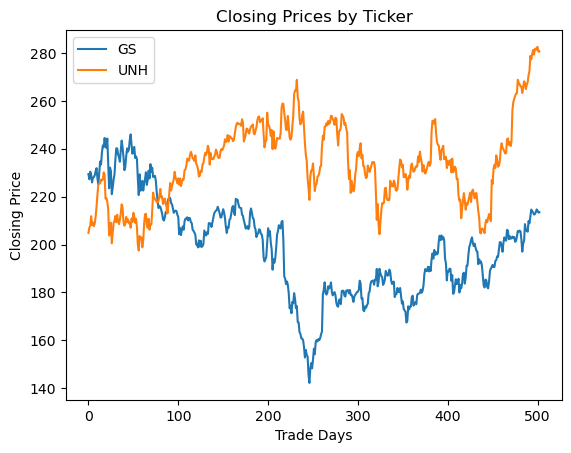

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# READ DATA
train = pd.read_csv('train_data.csv')
trade = pd.read_csv('trade_data.csv')

df_sub = train[train['tic'].isin(['GS', "UNH"])]
# df_sub = train
df_sub = df_sub[(df_sub['date'] > '2017-12-31') & (df_sub['date'] < '2020-01-01')] 
# print(df_sub[df_sub['close'] > 200]['tic'].unique())
df_sub = df_sub.sort_values('date')
print(df_sub.date.nunique(), 'Days')

groups = df_sub.groupby('tic')

# Iterate over the groups and plot each line separately
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group['close'].reset_index(drop=True), label=name)

# Set the title, x-axis label, and legend
ax.set_title('Closing Prices by Ticker')
ax.set_xlabel('Trade Days')
ax.set_ylabel('Closing Price')
ax.legend()

# Show the plot
plt.show()

In [2]:
# SUBSET THE DATA
df_price = df_sub.iloc[:,:7].reset_index(drop=True)

for c in df_price.columns[2:]:
    df_price[c + '_norm'] = (df_price[c] - df_price[c].min()) / (df_price[c].max() - df_price[c].min())

# display(df_price.head())

# SET THE NUMBER OF STOCKS
stock_dimension = 2

# SLICE THE DATA
df_5 = df_price.iloc[stock_dimension*0:-stock_dimension*4, :7].reset_index(drop=True)
df_4 = df_price.iloc[stock_dimension*1:-stock_dimension*3, :7].reset_index(drop=True)
df_3 = df_price.iloc[stock_dimension*2:-stock_dimension*2, :7].reset_index(drop=True)
df_2 = df_price.iloc[stock_dimension*3:-stock_dimension*1, :7].reset_index(drop=True)
df_1 = df_price.iloc[stock_dimension*4:, :7].reset_index(drop=True)

df_norm_5 = df_price.iloc[stock_dimension*0:-stock_dimension*4, 7:].reset_index(drop=True)
df_norm_4 = df_price.iloc[stock_dimension*1:-stock_dimension*3, 7:].reset_index(drop=True)
df_norm_3 = df_price.iloc[stock_dimension*2:-stock_dimension*2, 7:].reset_index(drop=True)
df_norm_2 = df_price.iloc[stock_dimension*3:-stock_dimension*1, 7:].reset_index(drop=True)
df_norm_1 = df_price.iloc[stock_dimension*4:, 7:].reset_index(drop=True)

# RENAME THE COLUMNS
df_5.columns = [c+'_5' for c in df_5.columns]
df_4.columns = [c+'_4' for c in df_4.columns]
df_3.columns = [c+'_3' for c in df_3.columns]
df_2.columns = [c+'_2' for c in df_2.columns]
df_1.columns = [c+'_1' for c in df_1.columns]

df_norm_5.columns = [c+'_5' for c in df_norm_5.columns]
df_norm_4.columns = [c+'_4' for c in df_norm_4.columns]
df_norm_3.columns = [c+'_3' for c in df_norm_3.columns]
df_norm_2.columns = [c+'_2' for c in df_norm_2.columns]
df_norm_1.columns = [c+'_1' for c in df_norm_1.columns]

# CHECK THE DIMENSION
print('Shapes:', df_5.shape, df_4.shape, df_3.shape, df_2.shape, df_1.shape)

# COMBINE THE DF
df_new = pd.concat([df_5, df_4, df_3, df_2, df_1], axis=1)
df_norm_new = pd.concat([df_norm_5, df_norm_4, df_norm_3, df_norm_2, df_norm_1], axis=1)
# display(df_new.head(10))
# display(df_norm_new.head(10))

# DROP
date = df_new['date_1']
df_new = df_new.drop(columns=[c for c in df_new.columns if 'date' in c or 'tic' in c])

# SORT DESCENDING
# df_new.columns = df_new.columns.sort_values(ascending=False)
df = pd.concat([df_new, df_norm_new], axis=1)
df['date'] = date
print('Shape:', df.shape)
df.to_csv('GSUNH_2y.csv', index=False)
df.head(10)

Shapes: (998, 7) (998, 7) (998, 7) (998, 7) (998, 7)
Shape: (998, 51)


,open_5,high_5,low_5,close_5,volume_5,open_4,high_4,low_4,close_4,volume_4,...,high_norm_2,low_norm_2,close_norm_2,volume_norm_2,open_norm_1,high_norm_1,low_norm_1,close_norm_1,volume_norm_1,date
0,257.769989,257.910004,253.919998,229.389938,2258300.0,255.479996,256.140015,253.220001,227.254562,2988200.0,...,0.696357,0.711674,0.620448,0.079089,0.688865,0.679857,0.697230,0.596721,0.091947,2018-01-08
1,221.020004,222.449997,220.000000,204.824677,3485000.0,221.619995,223.809998,220.520004,206.973343,2417600.0,...,0.493214,0.509525,0.496280,0.073069,0.501269,0.490786,0.508757,0.470072,0.088612,2018-01-08
2,255.479996,256.140015,253.220001,227.254562,2988200.0,255.229996,259.720001,254.320007,230.430695,2583200.0,...,0.679857,0.697230,0.596721,0.091947,0.675123,0.682857,0.704208,0.610343,0.080673,2018-01-09
3,221.619995,223.809998,220.520004,206.973343,2417600.0,224.339996,226.100006,224.169998,207.871719,2749100.0,...,0.490786,0.508757,0.470072,0.088612,0.477519,0.475929,0.499616,0.477466,0.081971,2018-01-09
4,255.229996,259.720001,254.320007,230.430695,2583200.0,257.179993,257.489990,253.690002,229.255356,2594700.0,...,0.682857,0.704208,0.610343,0.080673,0.690627,0.679643,0.702324,0.612837,0.091453,2018-01-10
5,224.339996,226.100006,224.169998,207.871719,2749100.0,225.190002,229.050003,224.720001,211.835556,2432800.0,...,0.475929,0.499616,0.477466,0.081971,0.478013,0.464357,0.497732,0.466375,0.068563,2018-01-10
6,257.179993,257.489990,253.690002,229.255356,2594700.0,254.750000,255.179993,251.619995,225.926712,2940500.0,...,0.679643,0.702324,0.612837,0.091453,0.473432,0.470857,0.502407,0.474231,0.077189,2018-01-11
7,225.190002,229.050003,224.720001,211.835556,2432800.0,228.130005,228.710007,224.610001,208.158752,2850800.0,...,0.464357,0.497732,0.466375,0.068563,0.695913,0.684929,0.706650,0.617954,0.072682,2018-01-11
8,254.750000,255.179993,251.619995,225.926712,2940500.0,252.800003,255.600006,252.619995,227.837753,2637300.0,...,0.470857,0.502407,0.474231,0.077189,0.695913,0.695000,0.714465,0.630105,0.088552,2018-01-12
9,228.130005,228.710007,224.610001,208.158752,2850800.0,224.759995,226.630005,223.300003,209.196060,2672200.0,...,0.684929,0.706650,0.617954,0.072682,0.496476,0.499286,0.522085,0.495686,0.129253,2018-01-12


### Step 2: Single Model

- change state space to 5 dimensions (open, high, low, close, volumn) with the past 5 days
- change 30 stocks to 1 or 2
- use longer time to train

- add penalty to no reward
- scale the reward and state space into around -1 to 1
- try to use openai or ray

- just present what we have done

In [1]:
from zhihu import model, ReplayBuffer, StockEnv
import pandas as pd
import matplotlib.pyplot as plt

state_dim: 53 action_dim: 2 max_action: 1.0
day: 499, episode: 100
begin_total_asset: 200000.00
end_total_asset: 964188.40
total_reward: 764188.40
total_cost: 11780.11
total_trades: 787


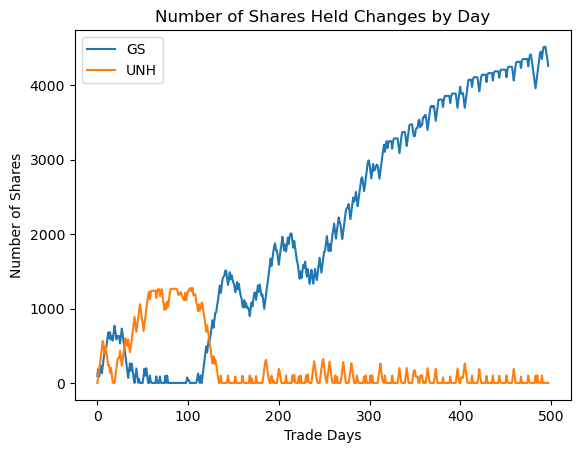

In [2]:
import numpy as np
import torch
import argparse
import os

import pandas as pd
import numpy as np
import datetime
import itertools
import yfinance as yf
import matplotlib.pyplot as plt

from yahoodownloader import YahooDownloader
from preprocessors import FeatureEngineer, data_split, INDICATORS
import config_tickers

stock_dimension = 2
initial_amount = 200000

tic = ['GS', "UNH"]
df = pd.read_csv('GSUNH_2y.csv')

env_kwargs = {
        "df": df,
    "hmax": 100, 
    "balance_scaling": initial_amount,
    "shares_scaling": initial_amount/200,
    "reward_scaling": 1/(200*(280-140)),
    "initial_amount": initial_amount, 
    "buy_cost_pct": 0.001, 
    "sell_cost_pct": 0.001, 
    "stock_dim": stock_dimension, 
    "print_verbosity": 100,
    "tic": tic
    
}


# DEFAULT HYPERPARAMETERS
default_seed = 123          # SEED
default_batch = 128          # BATCH
default_gamma = 0.95        # DISCOUNT INDEX
default_tau = 0.01 #0.005    # SOFT UPDATE PARAMETER
default_expl_noise = 0.1    # GAUSSIAN NOISE

if __name__ == '__main__':

    
    # SET THE PATH
    PATH = 'models/2ticker'

    # INITIATE THE ENV
    env = StockEnv.StockTradingEnv(**env_kwargs)

    # SET SEED
    env.seed(default_seed)

    # GET THE STATE AND ACTION DIMENSION
    state_dim = env.state_dim
    action_dim = env.action_dim
    max_action = float(env.action_space.high[0])
    print('state_dim:', state_dim, 'action_dim:', action_dim, 'max_action:', max_action)

    kwarg = {
        'state_dim': state_dim,
        'action_dim': action_dim,
        "max_action": max_action,
        'gamma': default_gamma,
        'tau': default_tau
    }

    # INITIATE THE MODEL
    policy = model.DDPGModel(**kwarg)
    policy.load(PATH)
    
    # SET UP REPLAY BUFFER
    replay_buffer = ReplayBuffer.ReplayBuffer(state_dim, action_dim)

    for e in range(100):
        # INITIATE
        state, done = env.reset(), False

        # INTERACT WITH ENV
        while not done:

            # SELECT AN ACTION WITH NOISES USING THE DDPG MODEL
            action = (
                policy.select_action(np.array(state))
                + np.random.normal(0, max_action * default_expl_noise, size=action_dim) 
            ).clip(-max_action, max_action) # clip limit the number into the given interval
            #print('action', action)

            # OBSERVE THE TRANSITION
            next_state, reward, done, _ = env.step(action)
            #print('reward', reward)

            # STORE THE DATA INTO REPLAY BUFFER
            replay_buffer.add(state, action, next_state, reward, done)

            # DETERMINE THE NEXT STATE OF THE ENVIRONMENT
            state = next_state

            # OPTIMIZE THE MODEL
            if replay_buffer.size > default_batch:
                policy.train(replay_buffer, default_batch)


        # # SAVE THE MODEL
        # if (e + 1)%100 == 0:
        #     policy.save(PATH)


        